## Example of Nirdust application
 The example imput is two Flamingos 2 (Gemini South) Klong band spectra of NGC 4945 with all their spectral lines manually removed. The spatial resolution of the data used here is 8 pc. 
 
The spectra correspond to:

1) A nuclear spectrum 8 pc wide.

2) An off-nuclear spectrum extracted at 200 pc distance from the nucleus and 25 pc wide 

These spectra can be found in the test_data folder of the Git-Hub repository for Nirdust.
No flux-calibration has been performed on these spectra.

In [ ]:
import nirdust as nd

### Read the spectra from the FITS files and store them in two separate NirdustSpectrum objects
Note that the redshift for this galaxy is 0.00188

In [ ]:
nuclear_file_name = TEST_PATH / "cont03.fits"
offnuclear_file_name = TEST_PATH / "external_spectrum_400pc_N4945.fits"

nuclear_spectrum = nd.read_spectrum(nuclear_file_name, 0, 0.00188)

offnuclear_spectrum = nd.read_spectrum(off_nuclear_file_name, 0, 0.00188)


### The read spectra are:
Note that as said before the useful continuum has been cleaned-up of other spectral features (except the CO absorption band beyond 2.27 micrometers that will be entirely eliminated in the next step) 

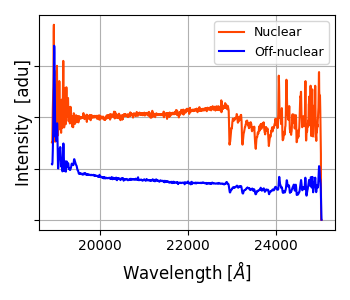

The red spectrum corresponds to the nuclear extraction and the blue one to the off-nuclear one. It can be seen that the red spectrum presents a slope that rises along longer wavelengths, a clear indication of presence of hot dust in type 2 AGNs.

### Cut the borders of the spectrum where the noise is too high

K-band spectra must be cut taking into account two factors:
In one hand, spectrum quality often drops in the borders of the spectral range due to detector response and atmospheric transmission. Special attention must be payed to bad telluric absorption correction, which commonly affects the beginning of the K band between 1.95 and 2.03 $\mu$m. In the other hand, in K$_{long}$ spectra, the beginning of the CO absorption band causes significant continuum absorption between 2.3 and 2.5 $\mu$m and hence the information of the dust presence is lost.

In [ ]:
cut_nuclear = nuclear_spectrum.cut_edges(19600, 22700)

cut_off_nuclear = off_nuclear_spectrum.cut_edges(19600, 22700)

Once the spectra are cut the obtained result is:

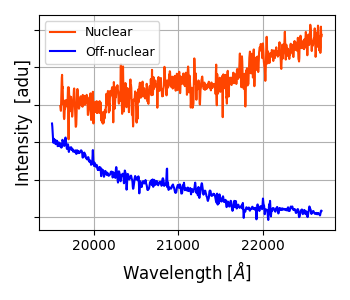

### Convert to frequency the spectral axes 

In [ ]:
freq_nuc = cut_nuclear.convert_to_frequency()
freq_offnuc = cut_off_nuclear.convert_to_frequency()

### Substract the off-nuclear spectrum using sp_correction 
sp_correction will normalize both spectra before subtraction

In [ ]:
prepared_spectrum = nd.sp_correction(freq_nuc, freq_offnuc)

After this step the dust component is isolated:

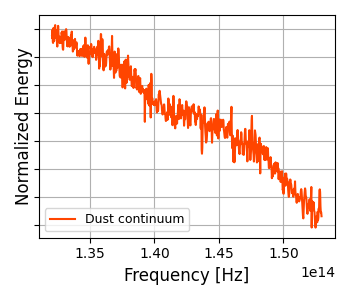

### Fit the spectrum

fit_blackbody requires an initial seed to perform the fitting, the user can choose any value, here a value of 1000 (K) was chosen.

The results of the fitting as well as the dust component will be stored in an object of type NirdustResults

In [ ]:
fit_results = prepared_spectrum.fit_blackbody(T=1000)

### Visualize the hot dust spectrum and the obtained blackbody model


In [ ]:
axis = fit_results.nplot()
plt.show()

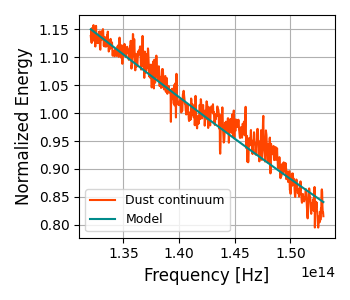

### The temperature of the dust and its uncertainty are:



In [ ]:
T = fit_results.temperature
uncertainty = np.sqrt(fit_results.covariance)